# Projeto Final 
## Curso de Big Data Science 

**Autor** : Maria Fisher



# Introdução 

Dados do IBGE mostraram que em 2019, apenas 16,6% da população brasileira com deficiência possuía ensino médio completo. Em 2021, dados mostram que o Brasil possui 17,3 milhões de pessoas que são portadoras de algumas deficiência. Esse contingente da população tem pouco suporte para continuar sua educação e portanto com menor portunidade de tornar-se cidadão independente e mais produtivo na comunidade.

Segundo, dados do IBGE (2010), teve um aumento significativo na inclusão de estudantes especiais com 640% das matrículas em escolas comuns e de 28% em escolas e classes especiais no período de 1998-2006. 

Em 2018, o número de estudantes matriculados portadores de deficiência teve um aumento de 0,04% em 2017 para 0,06% em 2018 do total de matriculados. Em 2019, o  número de matrículas da educação especial chegou a 1,3 milhão, com aumento de 34,4% em relação a 2015 (Inep, 2020). 
Porém, penas 0,52% do total de matriculados em cursos de graduação do Ensino Superior são declarados com deficiência (Quero Bolsa, 2020). 
.

No entanto, o suporte existente, seja na familia, escola, ou qualquer outra organização governamental e não governamental tem facilitado a uma parcela ainda que pequena, a possibilidade de continuar a estudar.

# Objetivo



O objetivo da análise é avaliar a performance dos inscritos no Enem que se declaram neurodivergentes. 

# Métodos

### Pre-processamento dos dados 

In [1]:
import numpy as np
import pandas as pd
import statistics  as sts
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import pearsonr
import zipfile
import warnings 
warnings.filterwarnings("ignore")


In [2]:
colunas = ['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE', 'TP_SEXO','TP_COR_RACA',
           'IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA','IN_DISCALCULIA','IN_AUTISMO',
           'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_MT', 'Q001', 'Q002', 'Q024', 'Q025']


In [3]:
with zipfile.ZipFile('../ProjetoFinal/archive.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
     %time enem_2019 = pd.read_csv(f, sep= ';', encoding='ISO-8859-1',usecols=colunas)
           

CPU times: user 39.9 s, sys: 2.8 s, total: 42.7 s
Wall time: 42.7 s


In [ ]:
enem_2019.head()

In [4]:
# Verificar total numero de candidatos neurodivergentes
neurodivergentes = enem_2019[['IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA',
                                      'IN_DISCALCULIA','IN_AUTISMO']]



In [5]:
# Total numero de candidatos neurodivergentes
neurodivergentes.sum()

IN_DEFICIENCIA_MENTAL    2248
IN_DEFICIT_ATENCAO       8338
IN_DISLEXIA              1596
IN_DISCALCULIA            382
IN_AUTISMO               1204
dtype: int64

Numero de neurodivergentes participantes do Enem em 2019

Deficiencia Mental  = 2248

Deficit de atenção  = 8338

Dislexia            = 1596

Discalculia         = 382

Autismo             = 1204

Para separar o dataset em Neurodivergentes e Normativos foi criado a função Neurodivergente onde para cada row (linha) que contém valor verdade (True = 1) retorna a condição Neurodivergente e caso seja falso (False = 0) retorna Normativo. O parametro da função é um Series object labelled "row". 

Depois, aplicou-se a função .apply() no dataset e na sequencia a coluna nova foi salva no dataset original. 



In [ ]:
#
def Neurodivergente (row):
   if row['IN_DEFICIENCIA_MENTAL'] == 1 :
      return 'Deficiente mental'
   if row['IN_DEFICIT_ATENCAO'] == 1 :
      return 'Deficit atenção'
   if row['IN_DISLEXIA'] == 1 :
      return 'Dislexia'
   if row['IN_DISCALCULIA'] == 1:
      return 'Discalculia'
   if row['IN_AUTISMO']  == 1:
      return 'Autismo'
   return 'Normativo'


In [ ]:
enem_2019.apply (lambda row: Neurodivergente(row), axis=1)

In [ ]:
enem_2019['Neurodivergente'] = enem_2019.apply (lambda row: Neurodivergente(row), axis=1)

In [ ]:
enem_2019.tail(10)

In [ ]:
# Mudar valores [nome da colunas, nomear classes, e valores booleanos]

enem_2019['Código_Geográfico'] = enem_2019['CO_MUNICIPIO_RESIDENCIA']
enem_2019['Município'] = enem_2019['NO_MUNICIPIO_RESIDENCIA']
enem_2019['UF'] = enem_2019['SG_UF_RESIDENCIA']
enem_2019['Cor_Raça'] = enem_2019['TP_COR_RACA'].replace([0, 1, 2, 3, 4, 5],['Não declarado','Branca','Preta', 'Parda', 'Amarela', 'Indígena'])
enem_2019['Gênero'] = enem_2019['TP_SEXO']
enem_2019['Idade'] = enem_2019['NU_IDADE']
enem_2019['Escolaridade_Pai'] = enem_2019['Q001']
enem_2019['Escolaridade_Mãe'] = enem_2019['Q002']
enem_2019['Computador?'] = enem_2019['Q024'].replace(['A','B','C', 'D', 'E'],['Não','Sim(1)','Sim(2)', 'Sim(3)', 'Sim(4+)'])
enem_2019['Acesso_Internet'] = enem_2019['Q025'].replace(['A','B'],['Não','Sim'])
enem_2019['Redação'] = enem_2019['NU_NOTA_REDACAO']
enem_2019['Ciências_Humanas'] = enem_2019['NU_NOTA_CH']
enem_2019['Ciências_Naturais'] = enem_2019['NU_NOTA_CN']
enem_2019['Matemática'] = enem_2019['NU_NOTA_MT']
enem_2019['Linguagens_Códigos'] = enem_2019['NU_NOTA_LC']





In [ ]:
enem_2019 = enem_2019.drop(columns=[ 'CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE',
                                      'TP_SEXO','TP_COR_RACA','IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA',
                                      'IN_DISCALCULIA','IN_AUTISMO', 'Q001','Q002','Q024','Q025','NU_NOTA_REDACAO',
                                      'NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_LC'])

In [ ]:
enem_2019.head()

In [ ]:
#Resumo do dataframe

def show_info(enem_2019):
    print('DATASET SHAPE: ', enem_2019.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(enem_2019.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(enem_2019.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(enem_2019.isnull().sum())
  
show_info(enem_2019)

In [ ]:
enem_2019 = enem_2019.dropna()
enem_2019 = enem_2019.reset_index(drop=True)

In [ ]:
msno.bar(enem_2019)

In [ ]:
enem_2019.tail(10)

In [ ]:
enem_2019.to_csv (r'../ProjetoFinal/enem2019.csv', index = False, header=True)

### Separar Normativos e Neurodivergentes em dois datasets

In [ ]:
normativo_enem2019 = enem_2019[enem_2019.Neurodivergente == 'Normativo']


In [ ]:
normativo_enem2019.head()

In [ ]:
normativo_enem2019.to_csv (r'../ProjetoFinal/normativo_enem2019.csv', index = False, header=True)


In [ ]:
neurodivergente_enem2019 = enem_2019[enem_2019.Neurodivergente != 'Normativo']

In [ ]:
neurodivergente_enem2019.head(10)

In [ ]:
neurodivergente_enem2019.to_csv (r'../ProjetoFinal/neurodivergente_enem2019.csv', index = False, header=True)


# Análise Descritiva 

In [13]:
enem_2019 = pd.read_csv (r'../ProjetoFinal/enem2019.csv')
enem_2019.head()


,Neurodivergente,Código_Geográfico,Município,UF,Cor_Raça,Gênero,Idade,Escolaridade_Pai,Escolaridade_Mãe,Computador?,Acesso_Internet,Redação,Ciências_Humanas,Ciências_Naturais,Matemática,Linguagens_Códigos
0,Normativo,1506807,Santarém,PA,Parda,M,21,D,E,Sim(1),Não,780.0,466.0,472.9,369.1,497.3
1,Normativo,1504059,Mãe do Rio,PA,Parda,F,16,D,E,Não,Não,600.0,495.4,358.9,416.5,482.3
2,Normativo,1505502,Paragominas,PA,Branca,F,18,H,E,Sim(2),Sim,640.0,538.7,574.2,571.5,582.6
3,Normativo,1500800,Ananindeua,PA,Branca,M,31,C,C,Não,Não,580.0,592.6,522.0,605.3,582.0
4,Normativo,1504208,Marabá,PA,Parda,F,30,B,B,Não,Sim,360.0,480.1,407.4,581.5,464.3


In [15]:
enem_2019.value_counts()

Neurodivergente  Código_Geográfico  Município      UF  Cor_Raça  Gênero  Idade  Escolaridade_Pai  Escolaridade_Mãe  Computador?  Acesso_Internet  Redação  Ciências_Humanas  Ciências_Naturais  Matemática  Linguagens_Códigos
Autismo          1100106            Guajará-Mirim  RO  Parda     F       21     H                 E                 Não          Não              0.0      380.1             335.7              361.8       475.7                 1
Normativo        3505708            Barueri        SP  Branca    M       27     E                 E                 Sim(1)       Sim              500.0    509.5             435.1              496.3       533.3                 1
                                                                         35     D                 D                 Sim(2)       Sim              660.0    602.2             542.0              503.5       594.1                 1
                                                                                E            

In [10]:
# Depois de eliminados valores NA temos quantidade de candidatos normativos e neurodivergentes
tp_neurodiver = enem_2019['Neurodivergente']
tp_neurodiver.value_counts()



Normativo            3692064
Deficit atenção         6772
Deficiente mental       1636
Autismo                  766
Dislexia                 703
Discalculia               66
Name: Neurodivergente, dtype: int64

### Porcentagens para cada neurotipo
As porcentagens de inscritos no Enem declarados neurodivergentes são pequenas, sendo assim dividimos o dataset em normativos e neurodivergentes para as analises descritivas.

In [19]:

Deficit_atencao = (6772/3702007) * 100
Deficit_atencao

0.18292780105494127

In [20]:
Autismo  = (766/3702007) * 100
Autismo

0.020691478973432518

In [21]:
Dislexia  = (703/3702007) * 100
Dislexia

0.01898969937117893

In [22]:
Deficiente_mental = (1636/3702007) * 100
Deficiente_mental

0.044192244909315406

In [23]:
Discalculia  = (66/3702007) * 100
Discalculia 

0.0017828167261704259

## Inscritos no Enem 2019 Neuronormativos

In [2]:
normativo_enem2019 = pd.read_csv (r'../ProjetoFinal/normativo_enem2019.csv')
normativo_enem2019.head()

,Neurodivergente,Código_Geográfico,Município,UF,Cor_Raça,Gênero,Idade,Escolaridade_Pai,Escolaridade_Mãe,Computador?,Acesso_Internet,Redação,Ciências_Humanas,Ciências_Naturais,Matemática,Linguagens_Códigos
0,Normativo,1506807,Santarém,PA,Parda,M,21,D,E,Sim(1),Não,780.0,466.0,472.9,369.1,497.3
1,Normativo,1504059,Mãe do Rio,PA,Parda,F,16,D,E,Não,Não,600.0,495.4,358.9,416.5,482.3
2,Normativo,1505502,Paragominas,PA,Branca,F,18,H,E,Sim(2),Sim,640.0,538.7,574.2,571.5,582.6
3,Normativo,1500800,Ananindeua,PA,Branca,M,31,C,C,Não,Não,580.0,592.6,522.0,605.3,582.0
4,Normativo,1504208,Marabá,PA,Parda,F,30,B,B,Não,Sim,360.0,480.1,407.4,581.5,464.3


In [25]:
# Cálculos da média e desvio padrão para os normativos
Idade = sts.stdev(normativo_enem2019['Idade'])/sts.mean(normativo_enem2019['Idade'])
Ciências_Naturais = sts.stdev(normativo_enem2019['Ciências_Naturais'])/sts.mean(normativo_enem2019['Ciências_Naturais'])
Ciências_Humanas = sts.stdev(normativo_enem2019['Ciências_Humanas'])/sts.mean(normativo_enem2019['Ciências_Humanas'])
Linguagens_Códigos = sts.stdev(normativo_enem2019['Linguagens_Códigos'])/sts.mean(normativo_enem2019['Linguagens_Códigos'])
Matemática = sts.stdev(normativo_enem2019['Matemática'])/sts.mean(normativo_enem2019['Matemática'])
Redação = sts.stdev(normativo_enem2019['Redação'])/sts.mean(normativo_enem2019['Redação'])

print('Idade: \n',round(Idade,2))
print('Ciências_Naturais: \n',round(Ciências_Naturais,2))
print('Ciências_Humanas : \n',round(Ciências_Humanas,2))
print('Linguagens_Códigos: \n',round(Linguagens_Códigos,2))
print('Matemática : \n',round(Matemática,2))
print('Redação: \n',round(Redação,2))

Idade: 
 0.33
Ciências_Naturais: 
 0.16
Ciências_Humanas : 
 0.16
Linguagens_Códigos: 
 0.12
Matemática : 
 0.21
Redação: 
 0.31


In [3]:
# Selecionar colunas com dados numericos
normativo_numerical = ['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']


In [4]:
# Descrição estatística das variaveis numericas
normativo_enem2019[normativo_numerical].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Idade,3692064.0,21.17,6.96,1.0,17.0,19.0,22.0,92.0
Ciências_Naturais,3692064.0,477.78,75.95,0.0,417.8,470.3,533.1,860.9
Ciências_Humanas,3692064.0,509.82,80.90,0.0,450.8,513.3,568.5,835.1
Linguagens_Códigos,3692064.0,522.38,62.68,0.0,485.5,527.8,566.5,801.7
Matemática,3692064.0,523.05,108.88,0.0,435.1,501.0,597.6,985.5
Redação,3692064.0,579.65,182.25,0.0,500.0,580.0,680.0,1000.0


In [5]:
va_quantitativa = ['float64', 'int64']
quantitativas = list(normativo_enem2019.select_dtypes(include=va_quantitativa).columns)
quantitativas

['Código_Geográfico',
 'Idade',
 'Redação',
 'Ciências_Humanas',
 'Ciências_Naturais',
 'Matemática',
 'Linguagens_Códigos']

In [6]:
# Selecionar colunas numericas para elaboração de gráficos 
normativo_quantitativas = ['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']


In [7]:
normativo_enem2019_quanti = normativo_enem2019[normativo_quantitativas]
normativo_enem2019_quanti.head()

,Idade,Ciências_Naturais,Ciências_Humanas,Linguagens_Códigos,Matemática,Redação
0,21,472.9,466.0,497.3,369.1,780.0
1,16,358.9,495.4,482.3,416.5,600.0
2,18,574.2,538.7,582.6,571.5,640.0
3,31,522.0,592.6,582.0,605.3,580.0
4,30,407.4,480.1,464.3,581.5,360.0


Idade


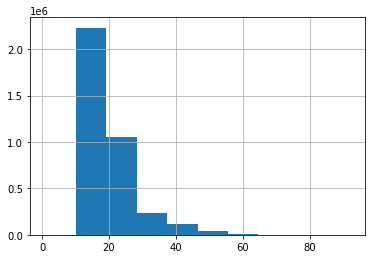

Ciências_Naturais


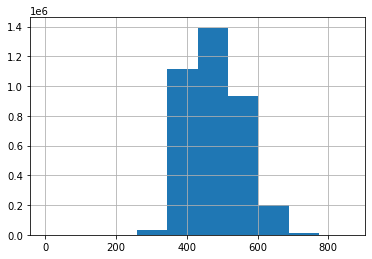

Ciências_Humanas


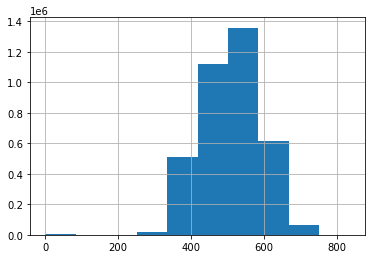

Linguagens_Códigos


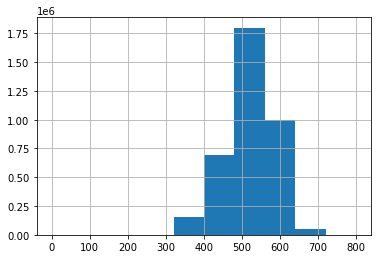

Matemática


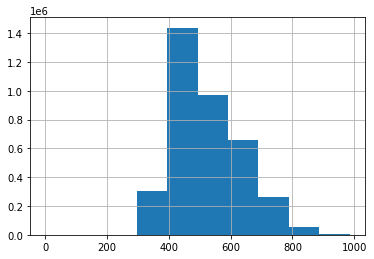

Redação


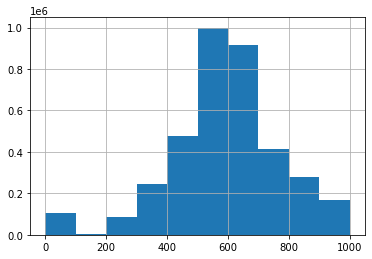

In [8]:
for va_quantitativa in normativo_enem2019_quanti:
    print (va_quantitativa)
    normativo_enem2019_quanti[va_quantitativa].hist(bins=10)
    plt.show() 

A análise das variaveis númericas mostram que a média das notas dos inscritos normativos não tiveram alta performance. Em todas as disciplinas a média ficou em torno de 500.     

In [10]:
va_nominal = ['object', 'bool']
qualitativas = list(normativo_enem2019.select_dtypes(include=va_nominal).columns)
qualitativas

['Neurodivergente',
 'Município',
 'UF',
 'Cor_Raça',
 'Gênero',
 'Escolaridade_Pai',
 'Escolaridade_Mãe',
 'Computador?',
 'Acesso_Internet']

In [43]:
# Selecionar colunas com dados categoricos
normativo_nominal = ['UF','Cor_Raça', 'Gênero','Escolaridade_Pai','Escolaridade_Mãe','Computador?', 'Acesso_Internet', 'Neurodivergente',]


In [44]:
normativo_enem2019_quali = normativo_enem2019[normativo_nominal]
normativo_enem2019_quali.head()


,UF,Cor_Raça,Gênero,Escolaridade_Pai,Escolaridade_Mãe,Computador?,Acesso_Internet,Neurodivergente
0,PA,Parda,M,D,E,Sim(1),Não,Normativo
1,PA,Parda,F,D,E,Não,Não,Normativo
2,PA,Branca,F,H,E,Sim(2),Sim,Normativo
3,PA,Branca,M,C,C,Não,Não,Normativo
4,PA,Parda,F,B,B,Não,Sim,Normativo


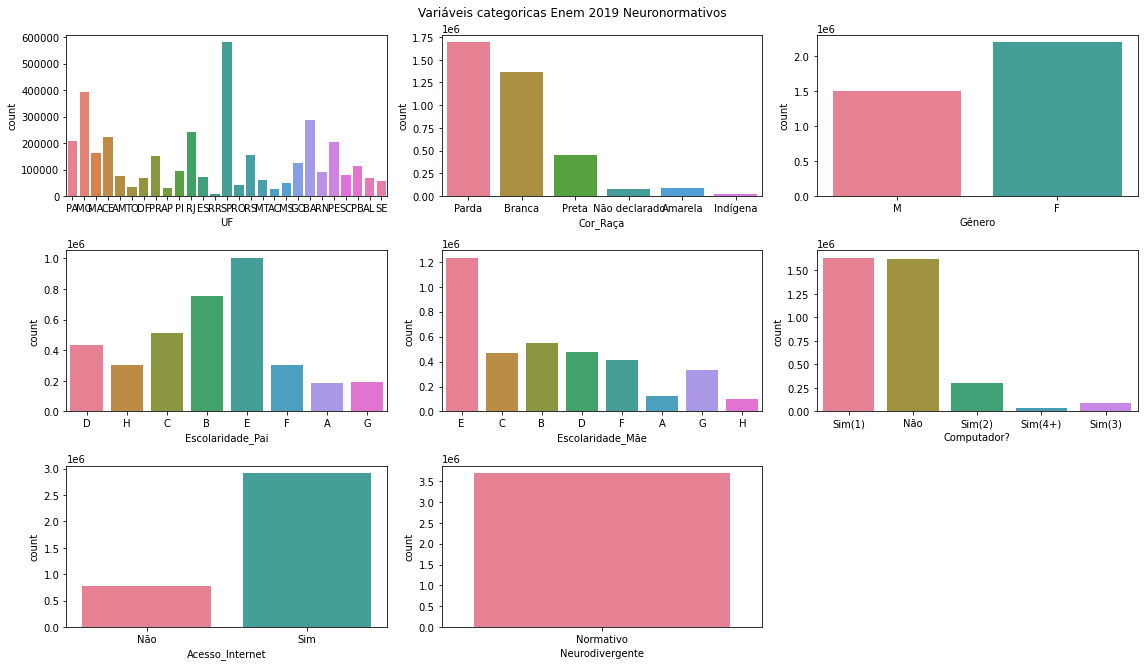

In [90]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(normativo_enem2019_quali):
    ax = plt.subplot(4, 3, i+1)
    sns.countplot(data=normativo_enem2019_quali, palette='husl', x=col, ax=ax) 
plt.suptitle('Variáveis categoricas Enem 2019 Neuronormativos')
plt.tight_layout()

Os estados de São Paulo, Minas Gerais e Bahia, foram os que receberam mais inscritos para o Enem em 2010. Destes a 59% são do gênero feminino.

Quanto ao perfil social se declararam 45% pardos, 37% brancos, 12% pretos, seguidos de amarelos e indigenas. 

Nivel de escolaridade do pai, 27% completaram Ensino Médio, 20% possuem 4ª série/5º ano incompleto, 13.9% completaram a 4ª série/5º ano e 5% nunca estudaram. 

Equanto que o nivel de escolaridade das mães, 33% completaram o Ensino Médio, 14.9% não completaram a 4ª série/5º ano, 12.9% completaram o Ensino Fundamental, e 3% não estudou. 




## Inscritos no Enem 2019 Neurodivergentes

In [12]:
neurodivergente_enem2019 = pd.read_csv (r'../ProjetoFinal/neurodivergente_enem2019.csv')
neurodivergente_enem2019.head()

,Neurodivergente,Código_Geográfico,Município,UF,Cor_Raça,Gênero,Idade,Escolaridade_Pai,Escolaridade_Mãe,Computador?,Acesso_Internet,Redação,Ciências_Humanas,Ciências_Naturais,Matemática,Linguagens_Códigos
0,Deficit atenção,1501907,Bujaru,PA,Preta,M,18,H,H,Não,Sim,580.0,343.9,423.2,456.0,453.9
1,Autismo,1506807,Santarém,PA,Parda,F,17,C,E,Não,Não,580.0,510.3,490.4,544.8,548.2
2,Deficit atenção,1503804,Jacundá,PA,Amarela,M,17,E,E,Sim(1),Não,480.0,548.1,451.8,657.5,544.1
3,Deficiente mental,1501402,Belém,PA,Parda,F,24,B,C,Não,Não,560.0,392.2,423.0,386.6,402.8
4,Deficit atenção,5204904,Campos Belos,GO,Branca,F,29,B,E,Sim(1),Sim,460.0,546.9,449.2,469.8,518.9


In [13]:
Idade = sts.stdev(neurodivergente_enem2019['Idade'])/sts.mean(neurodivergente_enem2019['Idade'])
Ciências_Naturais = sts.stdev(neurodivergente_enem2019['Ciências_Naturais'])/sts.mean(neurodivergente_enem2019['Ciências_Naturais'])
Ciências_Humanas = sts.stdev(neurodivergente_enem2019['Ciências_Humanas'])/sts.mean(neurodivergente_enem2019['Ciências_Humanas'])
Linguagens_Códigos = sts.stdev(neurodivergente_enem2019['Linguagens_Códigos'])/sts.mean(neurodivergente_enem2019['Linguagens_Códigos'])
Matemática = sts.stdev(neurodivergente_enem2019['Matemática'])/sts.mean(neurodivergente_enem2019['Matemática'])
Redação = sts.stdev(neurodivergente_enem2019['Redação'])/sts.mean(neurodivergente_enem2019['Redação'])

print('Idade: \n',round(Idade,2))
print('Ciências_Naturais: \n',round(Ciências_Naturais,2))
print('Ciências_Humanas : \n',round(Ciências_Humanas,2))
print('Linguagens_Códigos: \n',round(Linguagens_Códigos,2))
print('Matemática : \n',round(Matemática,2))
print('Redação: \n',round(Redação,2))

Idade: 
 0.26
Ciências_Naturais: 
 0.19
Ciências_Humanas : 
 0.19
Linguagens_Códigos: 
 0.16
Matemática : 
 0.25
Redação: 
 0.42


In [18]:
va_nominal = ['object', 'bool']
qualitativas = list(neurodivergente_enem2019.select_dtypes(include=va_nominal).columns)
qualitativas

['Neurodivergente',
 'Município',
 'UF',
 'Cor_Raça',
 'Gênero',
 'Escolaridade_Pai',
 'Escolaridade_Mãe',
 'Computador?',
 'Acesso_Internet']

In [19]:
# Selecionar colunas com dados categoricos
neurodivergente_qualitativas = ['UF','Neurodivergente', 'Cor_Raça', 'Gênero','Escolaridade_Pai','Escolaridade_Mãe','Computador?', 'Acesso_Internet']


In [20]:
neurodivergente_enem2019_quali = neurodivergente_enem2019[neurodivergente_qualitativas]
neurodivergente_enem2019_quali.head()

,UF,Neurodivergente,Cor_Raça,Gênero,Escolaridade_Pai,Escolaridade_Mãe,Computador?,Acesso_Internet
0,PA,Deficit atenção,Preta,M,H,H,Não,Sim
1,PA,Autismo,Parda,F,C,E,Não,Não
2,PA,Deficit atenção,Amarela,M,E,E,Sim(1),Não
3,PA,Deficiente mental,Parda,F,B,C,Não,Não
4,GO,Deficit atenção,Branca,F,B,E,Sim(1),Sim


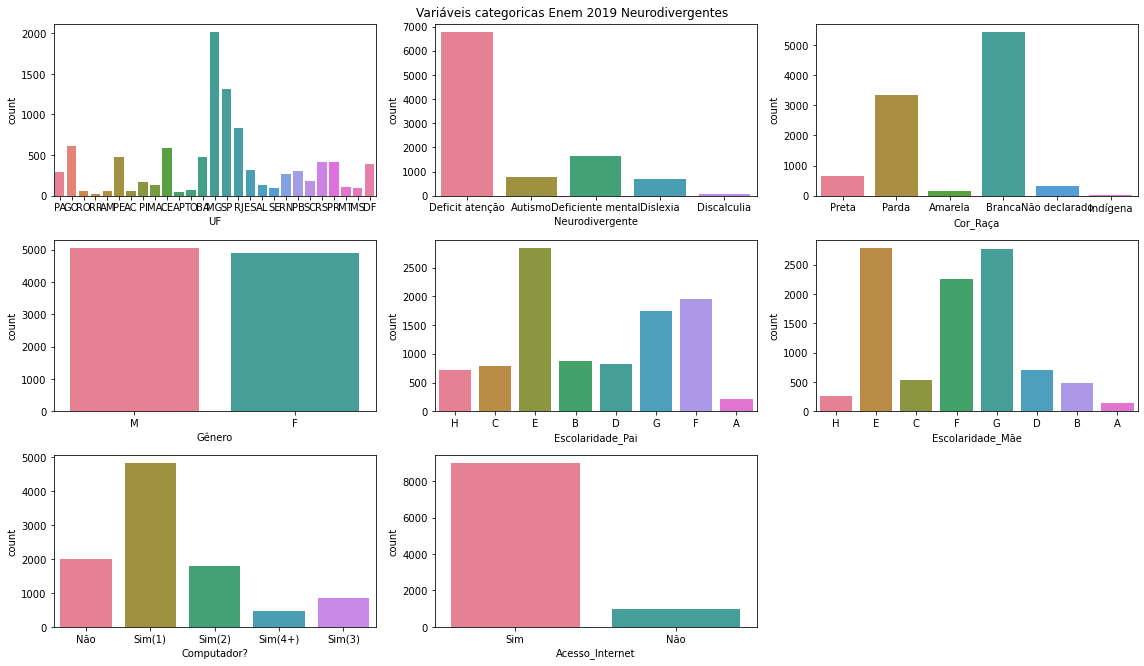

In [91]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(neurodivergente_enem2019_quali):
    ax = plt.subplot(4, 3, i+1)
    sns.countplot(data=neurodivergente_enem2019_quali, palette='husl', x=col, ax=ax) 
plt.suptitle('Variáveis categoricas Enem 2019 Neurodivergentes')
plt.tight_layout()

Considerou-se neurodivergentes aqueles que se declararam portador de: Autismo, Deficit de Atenção, Deficiência Mental, Dislexia, Discalculia. 

Nesse estudo verificou-se que no Enem de 2019, 68% inscritos são portadores de Deficit de Atenção, 16.5% Deficiência Mental, 7.7% Autismo, 7% Dislexia e apenas 0.7% apresenta Discalculia. 

Os estados com maior número de inscritos no Enem em 2010 e declaradas neurodivergentes são Minas Gerais, São Paulo e Rio de Janeiro. Destes a 50% são do gênero masculino e 49% feminino.

Quanto ao perfil social se declararam 54.7% brancos, 33.6% pardos, 6.6% pretos, seguidos 1.7% de amarelos e 0.3% de indigenas. 

Nivel de escolaridade do pai: 28.6% completaram Ensino Médio, 19.7% possuem Graudação, 17.5% tem Pós-graduação e 2.1% nunca estudaram. 

Equanto que o nivel de escolaridade das mães, 28% completaram o Ensino Médio, 27.9% tem Pós-graduação, 22.7% completou Graduação, apenas 1.5% não estudaram. 




In [111]:
neurodivergente_numerical = ['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']

In [112]:
neurodivergente_enem2019[neurodivergente_numerical].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Idade,9943.0,20.79,5.42,14.0,18.00,19.0,22.00,72.0
Ciências_Naturais,9943.0,514.63,98.90,0.0,426.20,522.3,591.85,836.6
Ciências_Humanas,9943.0,535.96,102.85,0.0,453.75,549.2,616.60,822.7
Linguagens_Códigos,9943.0,528.76,83.50,0.0,467.95,546.7,594.10,749.6
Matemática,9943.0,574.75,144.81,0.0,442.65,557.7,693.00,984.2
Redação,9943.0,624.28,259.23,0.0,480.00,660.0,840.00,1000.0


In [113]:
va_quantitativa = ['float64', 'int64']
quantitativas = list(neurodivergente_enem2019.select_dtypes(include=va_quantitativa).columns)
quantitativas

['Código_Geográfico',
 'Idade',
 'Redação',
 'Ciências_Humanas',
 'Ciências_Naturais',
 'Matemática',
 'Linguagens_Códigos']

In [114]:
neurodivergente_quantitativas = ['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']


In [115]:
neurodivergente_enem2019_quanti = neurodivergente_enem2019[neurodivergente_quantitativas]

Idade


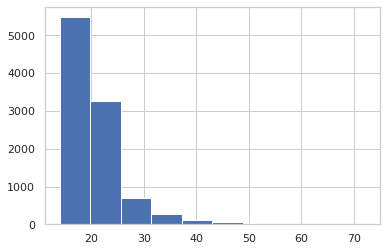

Ciências_Naturais


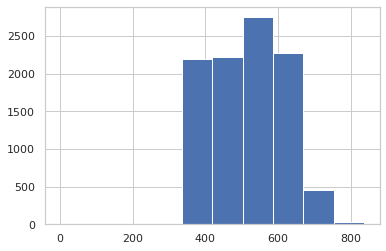

Ciências_Humanas


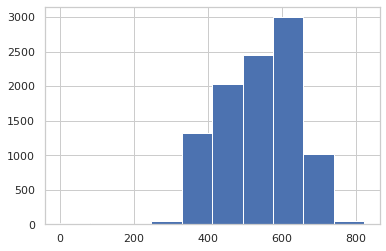

Linguagens_Códigos


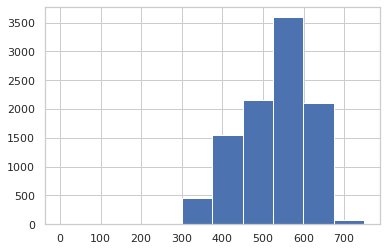

Matemática


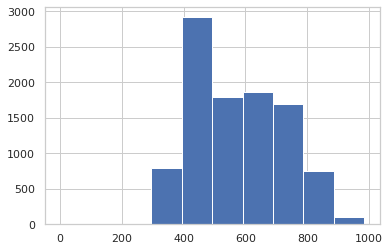

Redação


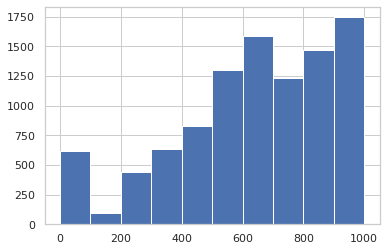

In [116]:
for va_quantitativa in neurodivergente_enem2019_quanti:
    print (va_quantitativa)
    neurodivergente_enem2019_quanti[va_quantitativa].hist(bins=10)
    plt.show() 

Com relação as notas, os neurodivergentes não diferem dos normativos, sendo que as notas se concentram ao redor da média de 500, no entanto a média da nota de Redação foi relativamente melhor do que os inscritos normativos, 

## Correlação 


In [156]:
va_correlacao_diverg = neurodivergente_enem2019[['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']]
va_correlacao_diverg.corr()

,Idade,Ciências_Naturais,Ciências_Humanas,Linguagens_Códigos,Matemática,Redação
Idade,1.000000,0.037761,0.048630,-0.008996,-0.000291,-0.024966
Ciências_Naturais,0.037761,1.000000,0.804900,0.787966,0.808087,0.697051
Ciências_Humanas,0.048630,0.804900,1.000000,0.837563,0.765165,0.718307
Linguagens_Códigos,-0.008996,0.787966,0.837563,1.000000,0.739650,0.731530
Matemática,-0.000291,0.808087,0.765165,0.739650,1.000000,0.681420
Redação,-0.024966,0.697051,0.718307,0.731530,0.681420,1.000000


<Figure size 720x504 with 0 Axes>

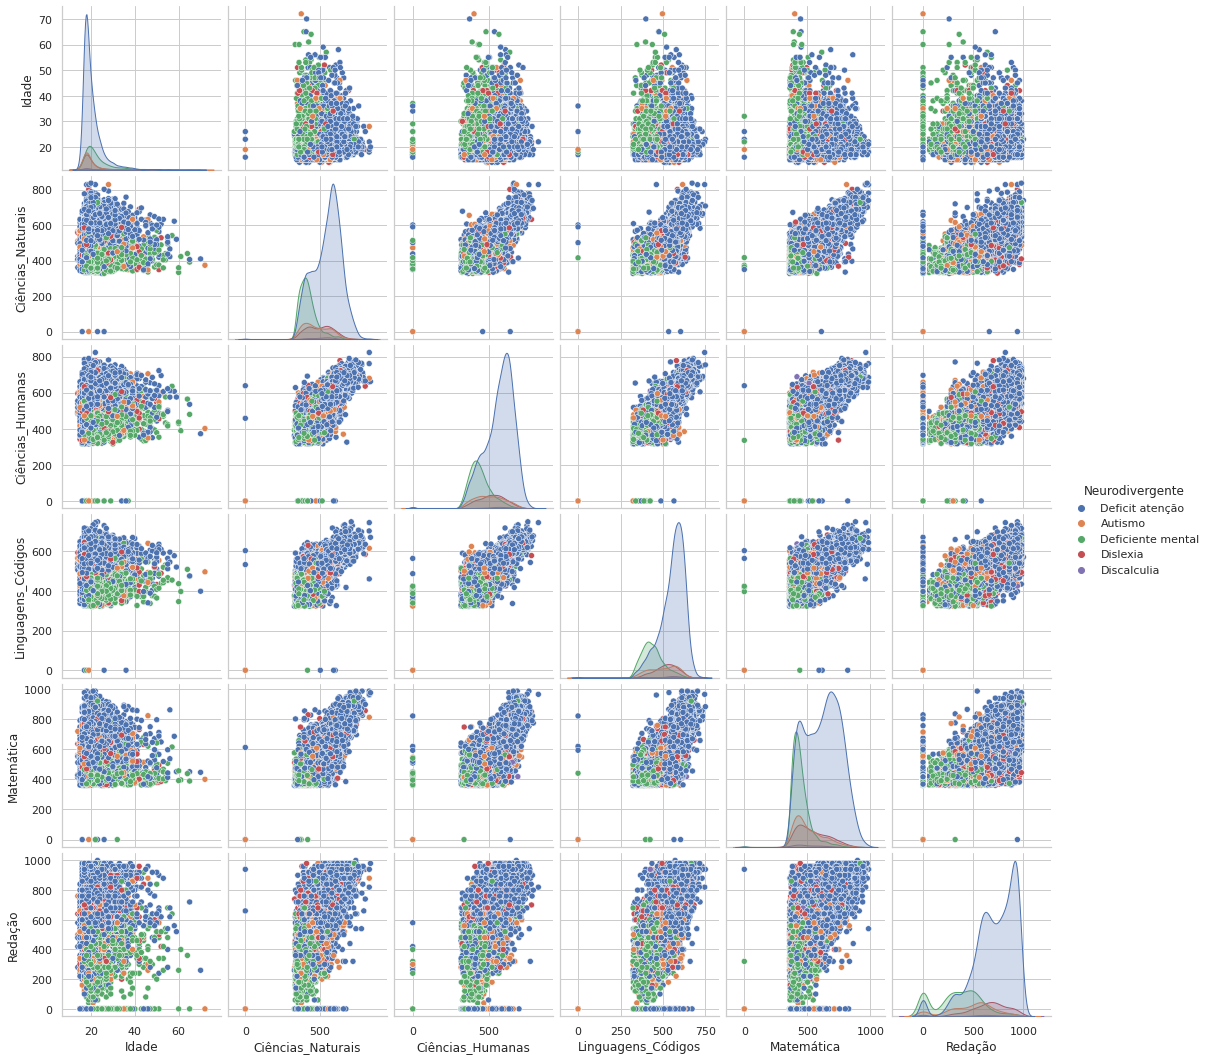

In [151]:
plt.figure(figsize=(10,7))
sns.pairplot(data=va_correlacao_diverg, hue="Neurodivergente")

<AxesSubplot:title={'center':'Correlação entre as features'}>

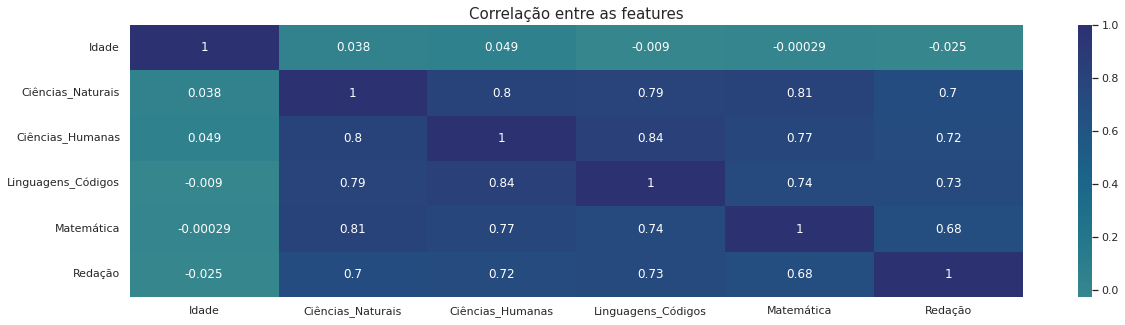

In [157]:
plt.figure(figsize=(20,5))
plt.title('Correlação entre as features', size=15)
sns.heatmap(va_correlacao_diverg.corr(), cmap='crest', center=0, annot=True)

In [158]:
va_correlacao_normativo = normativo_enem2019[['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']]
va_correlacao_normativo.corr()

,Idade,Ciências_Naturais,Ciências_Humanas,Linguagens_Códigos,Matemática,Redação
Idade,1.000000,-0.056735,-0.028639,-0.084253,-0.139686,-0.168938
Ciências_Naturais,-0.056735,1.000000,0.668527,0.642280,0.647447,0.504272
Ciências_Humanas,-0.028639,0.668527,1.000000,0.745092,0.609788,0.530973
Linguagens_Códigos,-0.084253,0.642280,0.745092,1.000000,0.589022,0.542152
Matemática,-0.139686,0.647447,0.609788,0.589022,1.000000,0.494562
Redação,-0.168938,0.504272,0.530973,0.542152,0.494562,1.000000


<AxesSubplot:title={'center':'Correlação entre as features'}>

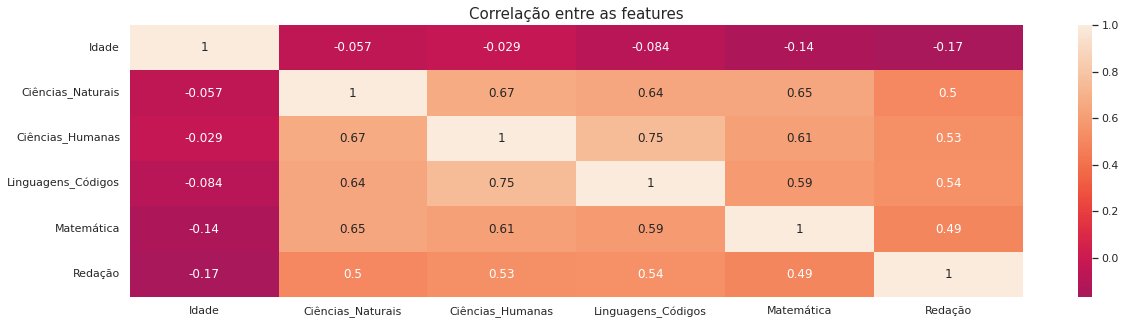

In [160]:
plt.figure(figsize=(20,5))
plt.title('Correlação entre as features', size=15)
sns.heatmap(va_correlacao_normativo.corr(), cmap='rocket', center=0, annot=True)

Na análise de correlação das notas dos inscritos neurodivergentes, percebe-se uma correlação mais forte entre Ciencias Naturais e Matemática, Linguagens e Código, e Ciências Humanas. 

Para neuronormativos a correlação mais forte é entre Linguagens e Códigos e Ciências Humanas. 

# Referências 

portal.mec.gov.br/seesp/arquivos/pdf/brasil.pdf

https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/notas_estatisticas_censo_da_educacao_basica_2019.pdf

https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/notas_estatisticas_censo_da_educacao_basica_2019.pdf

https://querobolsa.com.br/revista/numero-de-estudantes-com-deficiencia-cresce-no-ensino-superior-mas-permanencia-esbarra-na-falta-de-acessibilidade